## Using Pycaret to predict best model for binary classification problem and deploying the model on cloud

In [2]:
from pycaret.utils import version
version()

'2.3.0'

In [4]:
from pycaret.datasets import get_data
datasets= get_data('index')
#Viewing the various datasets available

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [5]:
#Selecting the juice dataset
data= get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [7]:
data.shape

(1070, 19)

In [8]:
data['Purchase'].value_counts()

CH    653
MM    417
Name: Purchase, dtype: int64

In [10]:
from pycaret.classification import *

In [15]:
s= setup(data= data, target='Purchase', session_id=123,log_experiment= True,experiment_name="juice1",normalize= True)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [17]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001B4A906E430>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000001B4A9068310>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001B4A906E...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001B4A906E...,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [18]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the 
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)  
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment par

In [19]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Purchase')),
                ('fix_perfect', Remove_100(target='Purchase')),
              

In [20]:
from sklearn import set_config

set_config(display='diagram')

get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Purchase')),
                ('fix_perfect', Remove_100(target='Purchase')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough')],
         verbose=False)

In [21]:
#LOGISTIC REGRESSION MODEL
lr= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8800,0.9468,0.7586,0.9167,0.8302,0.7387,0.7466
1,0.8400,0.9048,0.8621,0.7576,0.8065,0.6711,0.6751
2,0.9067,0.9160,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8267,0.9145,0.7241,0.8077,0.7636,0.6274,0.6298
4,0.8533,0.9258,0.7586,0.8462,0.8000,0.6848,0.6873
5,0.9067,0.9258,0.8621,0.8929,0.8772,0.8020,0.8023
6,0.7733,0.8178,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8000,0.8583,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.8108,0.8672,0.7500,0.7500,0.7500,0.5978,0.5978
9,0.7838,0.8649,0.6429,0.7500,0.6923,0.5272,0.5309


In [22]:
#DECISION TREE MODEL
dt= create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7961,0.6552,0.8261,0.7308,0.5908,0.6001
1,0.8267,0.8205,0.7931,0.7667,0.7797,0.6369,0.6371
2,0.8000,0.7897,0.7586,0.7333,0.7458,0.5810,0.5812
3,0.7600,0.7406,0.6552,0.7037,0.6786,0.4875,0.4883
4,0.7867,0.7942,0.7931,0.6970,0.7419,0.5614,0.5648
5,0.7600,0.7597,0.7586,0.6667,0.7097,0.5066,0.5097
6,0.6800,0.6563,0.5517,0.5926,0.5714,0.3166,0.3171
7,0.7333,0.7188,0.6786,0.6333,0.6552,0.4382,0.4389
8,0.7432,0.7523,0.6429,0.6667,0.6545,0.4504,0.4505
9,0.7703,0.7605,0.6429,0.7200,0.6792,0.5012,0.5031


In [25]:
#Tuning the model
tuned_dt=tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8789,0.5862,0.8500,0.6939,0.5527,0.5737
1,0.8267,0.8789,0.7586,0.7857,0.7719,0.6322,0.6325
2,0.8667,0.9265,0.7931,0.8519,0.8214,0.7153,0.7164
3,0.8133,0.8534,0.6897,0.8000,0.7407,0.5962,0.6002
4,0.8800,0.9224,0.7931,0.8846,0.8364,0.7421,0.7448
5,0.8400,0.8688,0.7931,0.7931,0.7931,0.6627,0.6627
6,0.7333,0.7597,0.6552,0.6552,0.6552,0.4378,0.4378
7,0.8000,0.8279,0.7500,0.7241,0.7368,0.5756,0.5759
8,0.7432,0.8455,0.6786,0.6552,0.6667,0.4580,0.4582
9,0.7838,0.8571,0.7500,0.7000,0.7241,0.5467,0.5476


In [26]:
ensemble_model(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9363,0.7241,0.8750,0.7925,0.6806,0.6879
1,0.8400,0.9089,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8533,0.9299,0.7931,0.8214,0.8070,0.6888,0.6891
3,0.8267,0.9007,0.7931,0.7667,0.7797,0.6369,0.6371
4,0.8533,0.9307,0.8621,0.7812,0.8197,0.6966,0.6990
5,0.8267,0.9044,0.7586,0.7857,0.7719,0.6322,0.6325
6,0.7600,0.8085,0.6897,0.6897,0.6897,0.4940,0.4940
7,0.7600,0.8207,0.6786,0.6786,0.6786,0.4871,0.4871
8,0.7568,0.8533,0.6786,0.6786,0.6786,0.4829,0.4829
9,0.7432,0.8742,0.6429,0.6667,0.6545,0.4504,0.4505


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=6,
                                                        max_features=1.0,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.002,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=5,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

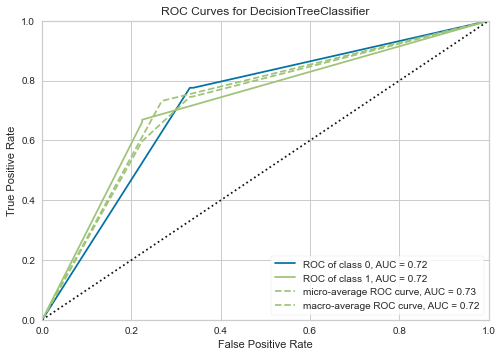

In [30]:
#ROC CURVE
plot_model(dt)

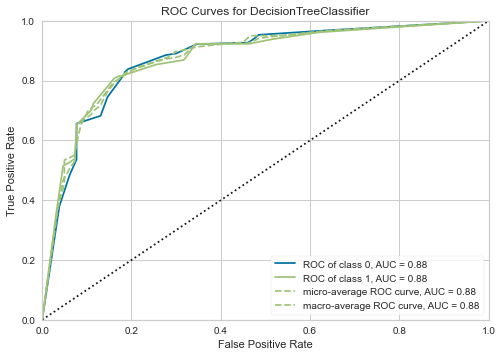

In [31]:
#ROC CURVE AFTER TUNING
plot_model(tuned_dt)

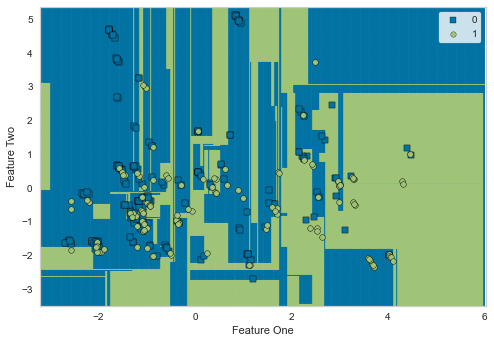

In [27]:
#BOUNDARY PLOT
plot_model(dt,plot='boundary')

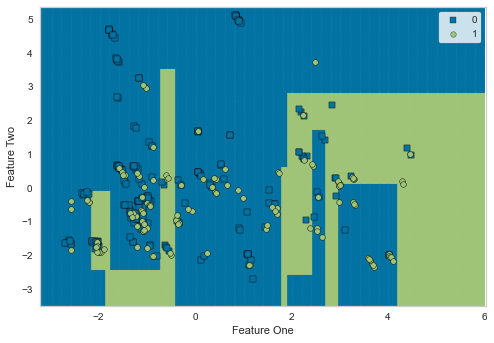

In [32]:
#BOUNDARY PLOT AFTER TUNING
plot_model(tuned_dt,plot='boundary')

In [33]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
#Random Forest classifier
rf= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.8801,0.6207,0.8571,0.7200,0.5853,0.6025
1,0.8400,0.9044,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8533,0.9243,0.7931,0.8214,0.8070,0.6888,0.6891
3,0.7467,0.8478,0.5862,0.7083,0.6415,0.4483,0.4531
4,0.8667,0.9490,0.7931,0.8519,0.8214,0.7153,0.7164
5,0.8933,0.9250,0.8966,0.8387,0.8667,0.7779,0.7791
6,0.7067,0.7669,0.6207,0.6207,0.6207,0.3816,0.3816
7,0.7200,0.7834,0.6429,0.6207,0.6316,0.4059,0.4060
8,0.7432,0.8439,0.7500,0.6364,0.6885,0.4726,0.4772
9,0.7838,0.8571,0.6786,0.7308,0.7037,0.5339,0.5348


In [24]:
#Selecting all the models available in models()
select_models=[create_model(i) for i in models().index.to_list()]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.9048,0.6897,0.8333,0.7547,0.6225,0.6292
1,0.8400,0.9048,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8133,0.9078,0.7586,0.7586,0.7586,0.6064,0.6064
3,0.7600,0.8696,0.6552,0.7037,0.6786,0.4875,0.4883
4,0.8533,0.9453,0.8276,0.8000,0.8136,0.6927,0.6930
5,0.8533,0.9037,0.7931,0.8214,0.8070,0.6888,0.6891
6,0.7200,0.7864,0.6897,0.6250,0.6557,0.4207,0.4222
7,0.7333,0.8188,0.6071,0.6538,0.6296,0.4217,0.4224
8,0.7568,0.8502,0.6429,0.6923,0.6667,0.4756,0.4764
9,0.8108,0.8540,0.7500,0.7500,0.7500,0.5978,0.5978


In [34]:
#Choosing the best model
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8381,0.8942,0.7591,0.8099,0.7820,0.6537,0.6563,0.8510
ridge,Ridge Classifier,0.8328,0.0000,0.7629,0.7975,0.7775,0.6439,0.6468,0.0220
lda,Linear Discriminant Analysis,0.8328,0.8911,0.7664,0.7951,0.7782,0.6443,0.6470,0.0250
ada,Ada Boost Classifier,0.8221,0.8810,0.7349,0.7910,0.7598,0.6190,0.6221,0.1200
gbc,Gradient Boosting Classifier,0.8128,0.8892,0.7453,0.7665,0.7538,0.6030,0.6051,0.1090
lightgbm,Light Gradient Boosting Machine,0.7968,0.8745,0.7241,0.7412,0.7315,0.5681,0.5693,0.5270
rf,Random Forest Classifier,0.7967,0.8682,0.7209,0.7460,0.7301,0.5676,0.5708,0.2800
xgboost,Extreme Gradient Boosting,0.7901,0.8683,0.7174,0.7319,0.7234,0.5545,0.5556,0.4580
svm,SVM - Linear Kernel,0.7806,0.0000,0.7057,0.7223,0.7073,0.5328,0.5386,0.0210
knn,K Neighbors Classifier,0.7781,0.8418,0.6756,0.7314,0.6993,0.5243,0.5281,0.0280


In [35]:
#logs can be exported to excel
get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Accuracy,metrics.Prec,metrics.TT,metrics.AUC,...,tags.Run ID,tags.URI,tags.Source,tags.mlflow.source.name,tags.USI,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.log-model.history,tags.mlflow.runName,tags.Run Time
0,6dd9aab18f4e4020bb71b6cd1e7c7152,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/6dd9aab...,2021-03-27 12:49:06.666000+00:00,2021-03-27 12:49:07.444000+00:00,0.564300,0.483900,0.034,0.535100,...,6dd9aab18f4e4020bb71b6cd1e7c7152,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""6dd9aab18f4e4020bb71b6cd1e7c7152""...",Quadratic Discriminant Analysis,0.82
1,45a810564bb140cbaffc3dab821502a2,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/45a8105...,2021-03-27 12:49:05.906000+00:00,2021-03-27 12:49:06.360000+00:00,0.767400,0.700600,0.019,0.758900,...,45a810564bb140cbaffc3dab821502a2,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""45a810564bb140cbaffc3dab821502a2""...",Decision Tree Classifier,0.56
2,bf77070569064f0092b31b80a848146a,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/bf77070...,2021-03-27 12:49:04.918000+00:00,2021-03-27 12:49:05.523000+00:00,0.768600,0.682800,0.023,0.840700,...,bf77070569064f0092b31b80a848146a,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""bf77070569064f0092b31b80a848146a""...",Naive Bayes,0.6
3,1958ad68019d44fd9d1d261975b6db6a,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/1958ad6...,2021-03-27 12:49:04.019000+00:00,2021-03-27 12:49:04.566000+00:00,0.774000,0.704500,0.212,0.834300,...,1958ad68019d44fd9d1d261975b6db6a,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""1958ad68019d44fd9d1d261975b6db6a""...",Extra Trees Classifier,2.54
4,73ea5be4072640c0b98c8c3734c4d1c1,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/73ea5be...,2021-03-27 12:49:03.020000+00:00,2021-03-27 12:49:03.630000+00:00,0.778100,0.731400,0.028,0.841800,...,73ea5be4072640c0b98c8c3734c4d1c1,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""73ea5be4072640c0b98c8c3734c4d1c1""...",K Neighbors Classifier,0.66
5,ee6f6f79401f4eb3a8c7514ab0ca6f14,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/ee6f6f7...,2021-03-27 12:49:02.167000+00:00,2021-03-27 12:49:02.719000+00:00,0.780600,0.722300,0.021,0.000000,...,ee6f6f79401f4eb3a8c7514ab0ca6f14,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""ee6f6f79401f4eb3a8c7514ab0ca6f14""...",SVM - Linear Kernel,0.62
6,c49d6ae3b3434f1aafba736cdc60738f,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/c49d6ae...,2021-03-27 12:49:00.894000+00:00,2021-03-27 12:49:01.844000+00:00,0.790100,0.731900,0.458,0.868300,...,c49d6ae3b3434f1aafba736cdc60738f,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""c49d6ae3b3434f1aafba736cdc60738f""...",Extreme Gradient Boosting,5.07
7,249911d7ce1e4d369a5d6d58f361ea64,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/249911d...,2021-03-27 12:48:59.954000+00:00,2021-03-27 12:49:00.530000+00:00,0.796700,0.746000,0.280,0.868200,...,249911d7ce1e4d369a5d6d58f361ea64,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""249911d7ce1e4d369a5d6d58f361ea64""...",Random Forest Classifier,3.25
8,fbf7a436f3f74156a9737d81bafed5c5,1,FINISHED,file:///C:/Users/LC/Documents/mlruns/1/fbf7a43...,2021-03-27 12:48:59.046000+00:00,2021-03-27 12:48:59.614000+00:00,0.796800,0.741200,0.527,0.874500,...,fbf7a436f3f74156a9737d81bafed5c5,1e612ee2,compare_models,C:\Users\LC\anaconda3\lib\site-packages\ipyker...,363e,LOCAL,LC,"[{""run_id"": ""fbf7a436f3f74156a9737d81bafed5c5""...",Light Gradient Boosting Machine,5.68
9,96e8fe0230b94b96b000d4aaa77abbc9,1,FINISHED,file:///C:/Users/L

In [ ]:
#Deploying model on cloud
deploy_model(best,'classification', platform='aws', authentication={'bucket':'pycaret_test'})